### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import random
import os


### Data Generation

In [157]:
def generate_harder_spiral_data(points_per_class=200, noise=0.4,
num_classes=3):
    N = points_per_class # points per class
    D = 2 # input dimension
    K = num_classes # number of classes
    X = np.zeros((N*K,D))
    y = np.zeros(N*K, dtype='uint8')
    
    for j in range(K):
        
        # indexes for eacah class
        # 0-200, 200-400, 400-600
        ix = range(N*j, N*(j+1))
        
        # radius
        r = np.linspace(0.0, 1, N)

        # angle
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
        
    return X, y

In [167]:
X, y = generate_harder_spiral_data()

In [168]:
y[y==2].shape

(200,)

### EDA

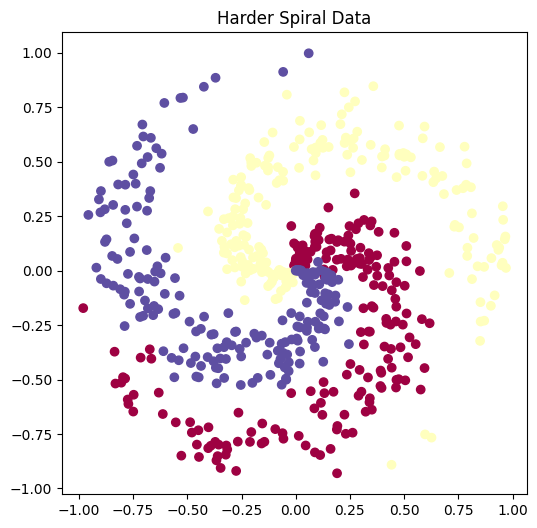

In [169]:
# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")
plt.title('Harder Spiral Data')
plt.show()

In [159]:
# 2d array which represent position of a spiral in a 2d plane
X

array([[-0.00000000e+00,  0.00000000e+00],
       [-7.91463993e-04,  4.96240590e-03],
       [-2.10056879e-03,  9.82828373e-03],
       ...,
       [-7.15081880e-01,  6.84586306e-01],
       [-4.72608280e-01,  8.75566339e-01],
       [-6.65448781e-01,  7.46443514e-01]])

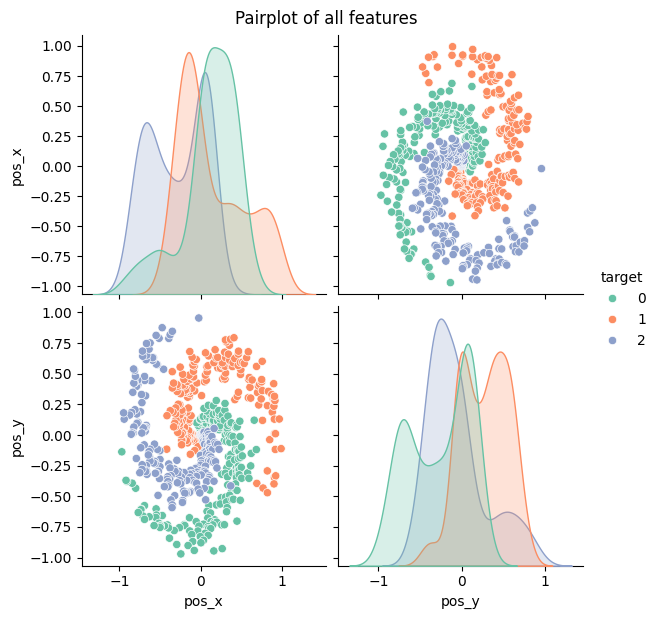

In [160]:
df_plot = pd.DataFrame(X, columns=['pos_x', 'pos_y'])
df_plot['target'] = y
sns.pairplot(df_plot, hue='target', palette='Set2', height=3)
plt.suptitle("Pairplot of all features", y=1.02)
plt.show()

### Data Preparation

In [170]:
y = to_categorical(y)

In [171]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [172]:
#  y used is encoded
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model with 1 hidden layer

In [106]:
model_mlp = Sequential([
    InputLayer(shape=(2,)),
    Dense(4, activation='relu'),
    Dense(3, activation='softmax')

])

model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_mlp.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [108]:
history_2mlp = model_mlp.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3597 - loss: 0.9643  
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3588 - loss: 0.9655 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3387 - loss: 0.9535 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4232 - loss: 0.9338 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4963 - loss: 0.9297 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5192 - loss: 0.9257 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5484 - loss: 0.9099 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5203 - loss: 0.9084 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5897 - loss: 0.8807 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5216 - loss: 0.9021 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5346 - loss: 0.8898 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

### Why we need more hidden layers

- Accuracy and loss is around 0.6

### Model with 2 hidden layers

In [109]:
model_2mlp = Sequential([
    InputLayer(shape=(2,)),
    Dense(6, activation='relu'), 
    Dense(4, activation='relu'),
    Dense(3, activation='softmax')

])

model_2mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2mlp.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [110]:
history_2mlp = model_2mlp.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3299 - loss: 1.2782   
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3254 - loss: 1.2323 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3089 - loss: 1.2216 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3425 - loss: 1.1869 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3144 - loss: 1.1918 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3335 - loss: 1.1485 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2903 - loss: 1.1529 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3084 - loss: 1.1427 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2929 - loss: 1.1466 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2954 - loss: 1.1329 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3015 - loss: 1.1191 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

### Model with 3 hidden layers

In [111]:
model_3mlp = Sequential([
    InputLayer(shape=(2,)),
    Dense(6, activation='relu'),
    Dense(8, activation='relu'), 
    Dense(4, activation='relu'),
    Dense(3, activation='softmax')

])

model_3mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_3mlp.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125 (500.00 B)

 Trainable params: 125 (500.00 B)

 Non-trainable params: 0 (0.00 B)

In [112]:
history_3mlp = model_3mlp.fit(X_train, y_train, epochs=100, verbose=1)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4304 - loss: 1.0692   
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3604 - loss: 1.0559 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5044 - loss: 1.0362 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5347 - loss: 1.0225 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5440 - loss: 1.0073 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5735 - loss: 0.9862 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5623 - loss: 0.9731 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5823 - loss: 0.9635 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6291 - loss: 0.9326 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5974 - loss: 0.9384 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6410 - loss: 0.9188 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

### Model with 3 layers
- This architecture looks promising, the train loss went down to 0.3
- Experimenting with different lrs 

### Computing Loss and Model Performance

In [113]:
y_true = np.argmax(y_test, axis=1)

In [114]:
y_pred_3mlp = np.argmax(model_3mlp.predict(X_test), axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [115]:
print("Accuracy", accuracy_score(y_true, y_pred_3mlp))

Accuracy 0.8916666666666667


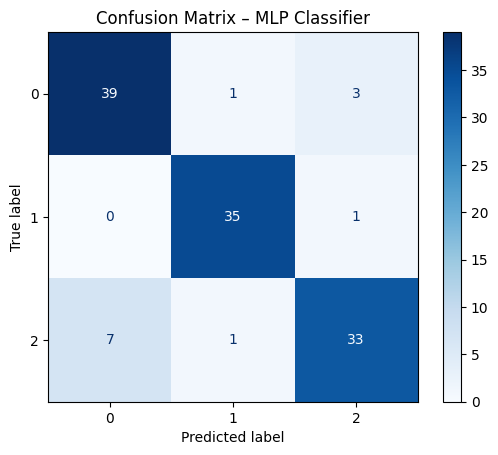

In [116]:
cm = confusion_matrix(y_true, y_pred_3mlp)

# Create the confusion matrix display object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2'])

# Plot the confusion matrix
cm_display.plot(cmap='Blues')  # Optional: you can adjust the colormap
plt.title("Confusion Matrix – MLP Classifier")
plt.show()

In [117]:
train_loss = history_3mlp.history['loss']
test_loss, test_accuracy = model_mlp.evaluate(X_test, y_test, verbose=0)


### ❗Test Loss is not acceptable 

- Continuing to add more layers

### 4 hidden layers

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [125]:
model_mlp = Sequential([
    InputLayer(shape=(2,)),
    Dense(6, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'), 
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])


model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_mlp.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [126]:
history_mlp = model_mlp.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3149 - loss: 1.2127
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3612 - loss: 1.1319 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2816 - loss: 1.1216 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2971 - loss: 1.0897 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4394 - loss: 1.0579 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4966 - loss: 1.0408 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4255 - loss: 1.0370 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4978 - loss: 1.0111 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5325 - loss: 0.9938 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5247 - loss: 0.9922 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5332 - loss: 0.9719 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [128]:
y_true = np.argmax(y_test, axis=1)
y_pred_mlp = np.argmax(model_mlp.predict(X_test), axis=1)
print("Accuracy", accuracy_score(y_true, y_pred_mlp))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy 0.9166666666666666


In [130]:
train_loss = history_mlp.history['loss']
test_loss, test_accuracy = model_mlp.evaluate(X_test, y_test, verbose=0)


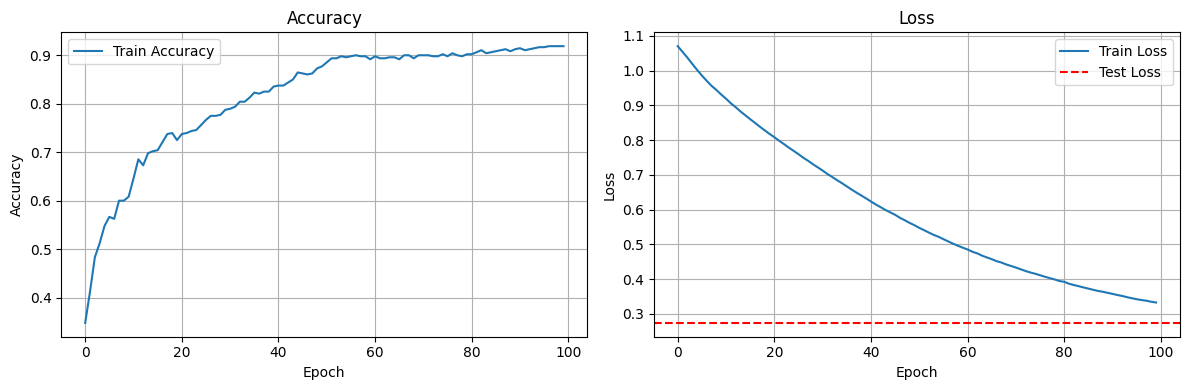

In [131]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_3mlp.history['accuracy'], label='Train Accuracy')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_3mlp.history['loss'], label='Train Loss')
axs[1].axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
axs[1].set_title('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Experimenting with Learning Rates

### Ensuring same results

- Since dataset is small it more sensitive to changes therefore I am setting seed

In [298]:

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [261]:
X, y = generate_harder_spiral_data()
y = to_categorical(y)
scalar= StandardScaler()
X_scaled = scalar.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [262]:
model_mlp_lr_1 = Sequential([
    InputLayer(shape=(2,)),
    Dense(6, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'), 
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])
optimizer = Adam(learning_rate=0.01)
model_mlp_lr_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp_lr_1.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_184 (Dense)               │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_185 (Dense)               │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_186 (Dense)               │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_188 (Dense)               │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [263]:
history_mlp_lr_1 = model_mlp_lr_1.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3824 - loss: 1.0386
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5525 - loss: 0.9330 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5729 - loss: 0.8567 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6118 - loss: 0.7931 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6359 - loss: 0.7403 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6861 - loss: 0.6831 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7002 - loss: 0.6122 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7853 - loss: 0.5256 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8715 - loss: 0.4101 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8947 - loss: 0.3064 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9197 - loss: 0.2183 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [264]:
y_true = np.argmax(y_test, axis=1)
y_pred_mlp_lr_1 = np.argmax(model_mlp_lr_1.predict(X_test), axis=1)
print("Accuracy", accuracy_score(y_true, y_pred_mlp_lr_1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Accuracy 0.9916666666666667


### LR - Accuracy, loss

- 0.0001 - 55 %, 0.9
- 0.001  - 95 %, 0.12  ⭐ Improved accuracy and loss
- **0.01 - 98 %, 0.04**
- 0.1 - 80% 📉 Drops 


### Avoiding Overfitting 

- Moving Ahead with LR = 0.01

In [308]:
X, y = generate_harder_spiral_data()
y = to_categorical(y)
scalar= StandardScaler()
X_scaled = scalar.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [309]:
model_mlp_val= Sequential([
    InputLayer(shape=(2,)),
    Dense(6, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'), 
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])
optimizer = Adam(learning_rate=0.01)
model_mlp_val.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp_val.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_224 (Dense)               │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_225 (Dense)               │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [310]:
early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=5,              
    restore_best_weights=True 
)

In [311]:
history_mlp_val = model_mlp_val.fit(X_train, y_train, validation_split=0.2 ,epochs=100, verbose=1, callbacks=[early_stop])

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4129 - loss: 1.0726 - val_accuracy: 0.2604 - val_loss: 1.0092
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4302 - loss: 0.9643 - val_accuracy: 0.4583 - val_loss: 0.9153
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5134 - loss: 0.8525 - val_accuracy: 0.5104 - val_loss: 0.8392
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5286 - loss: 0.7862 - val_accuracy: 0.5833 - val_loss: 0.7907
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6391 - loss: 0.7297 - val_accuracy: 0.7188 - val_loss: 0.7317
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7546 - loss: 0.6700 - val_accuracy: 0.7708 - val_loss: 0.6686
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7882 - loss: 0.6170 - val_accuracy: 0.8021 - val_loss: 0.6058
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7966 - loss: 0.5578 - val_accuracy: 0.8021 -

In [312]:
y_true = np.argmax(y_test, axis=1)
y_pred_mlp_vale = np.argmax(model_mlp_val.predict(X_test), axis=1)
print("Accuracy", accuracy_score(y_true, y_pred_mlp_vale))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Accuracy 0.9333333333333333


In [313]:
train_loss = history_mlp_val.history['loss']
test_loss, test_accuracy = model_mlp_val.evaluate(X_test, y_test, verbose=0)


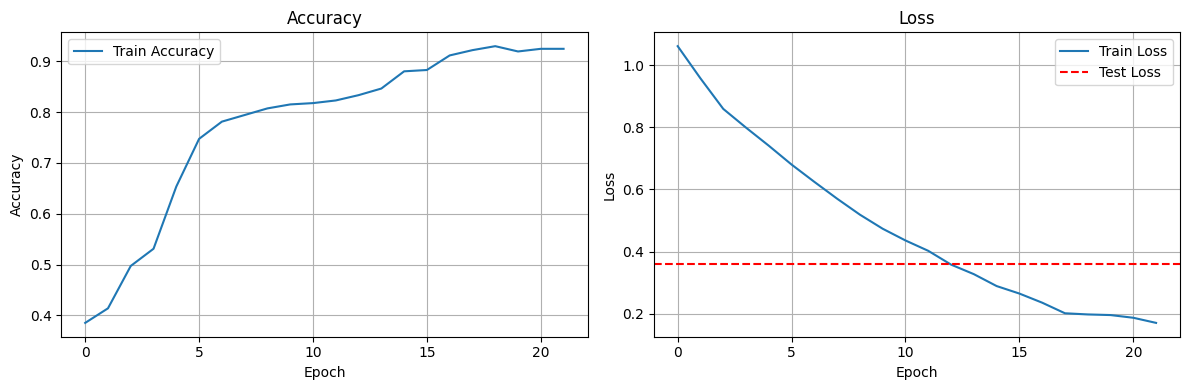

In [314]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_mlp_val.history['accuracy'], label='Train Accuracy')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_mlp_val.history['loss'], label='Train Loss')
axs[1].axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
axs[1].set_title('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

13799/13799 ━━━━━━━━━━━━━━━━━━━━ 12s 868us/step


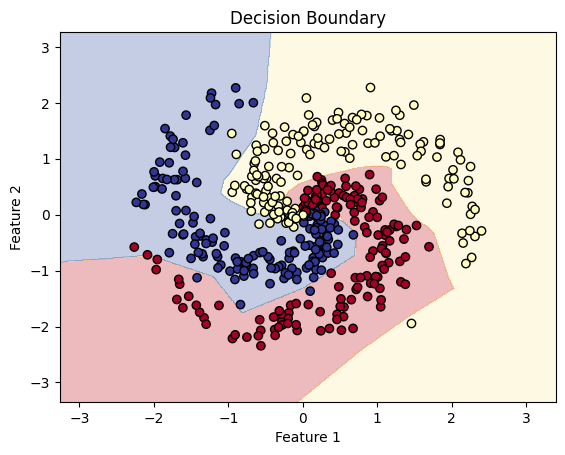

In [316]:
# Create a mesh grid over the 2D input space
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the mesh grid
Z = model_mlp_val.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)  # Convert probabilities to class labels

# Reshape the predictions back into the mesh grid shape
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)  # Color regions based on predicted class

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.argmax(axis=1), cmap=plt.cm.RdYlBu, edgecolors='k', marker='o')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()